# Extension 1 - Your own data

Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

In [63]:
# Importing the required stuff

import os
import random
import numpy as np
import matplotlib.pyplot as plt

from data import Data
from linear_regression import LinearRegression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
# Importing the data
tips_filename = 'data/tips.csv'
tips_data = Data(tips_filename)
# Printing the data
print(tips_data)

# Create a linear regression model
tips_reg = LinearRegression(tips_data)

data/tips.csv (244x3)
Headers:
  total_bill	  tip	  size	
-----------------------
Showing first 5/244 rows.
16.99	1.01	2.0	
10.34	1.66	3.0	
21.01	3.5	3.0	
23.68	3.31	2.0	
24.59	3.61	4.0	



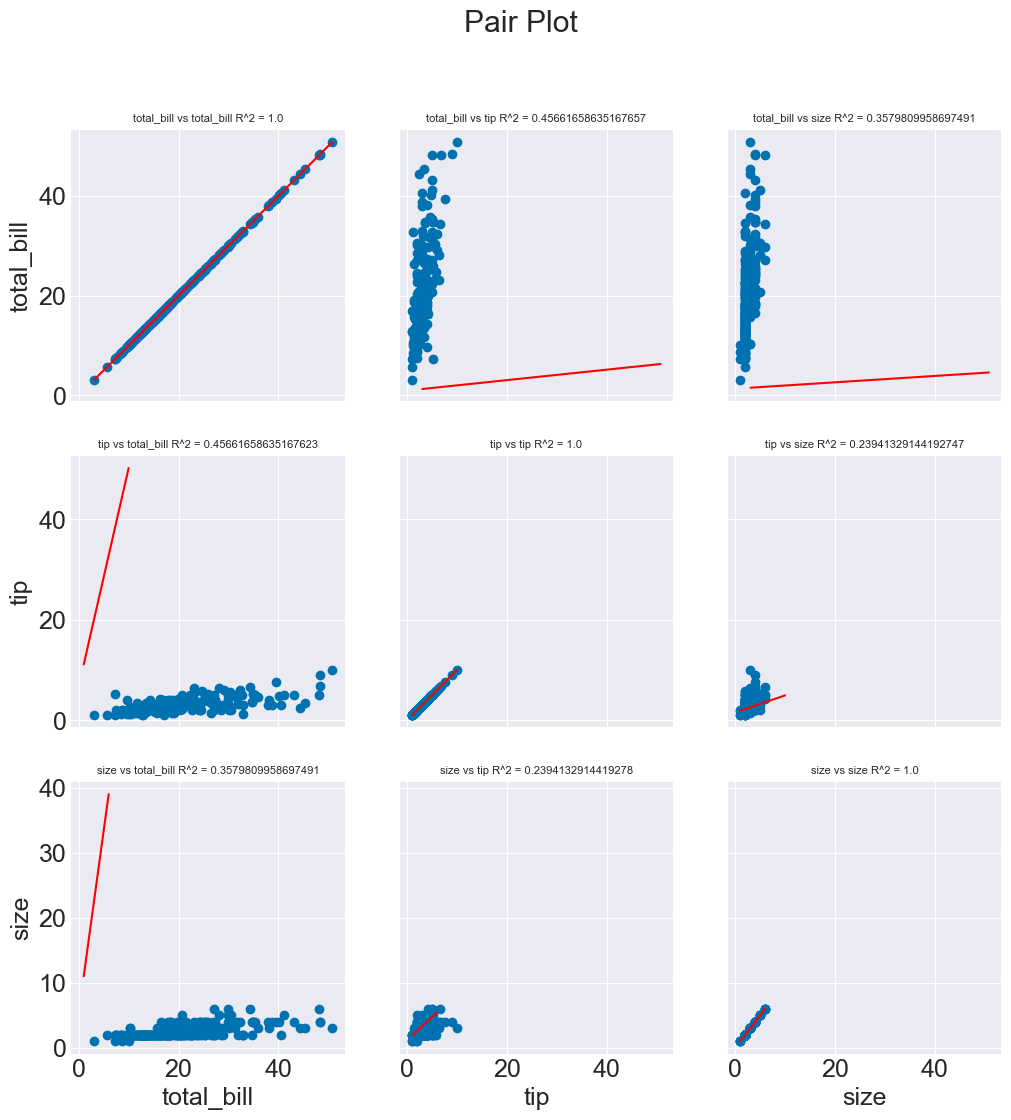

In [65]:
# Plotting pairplot without the histograms on the diagonal
tips_reg.pair_plot(tips_data.get_headers(), hists_on_diag = False)

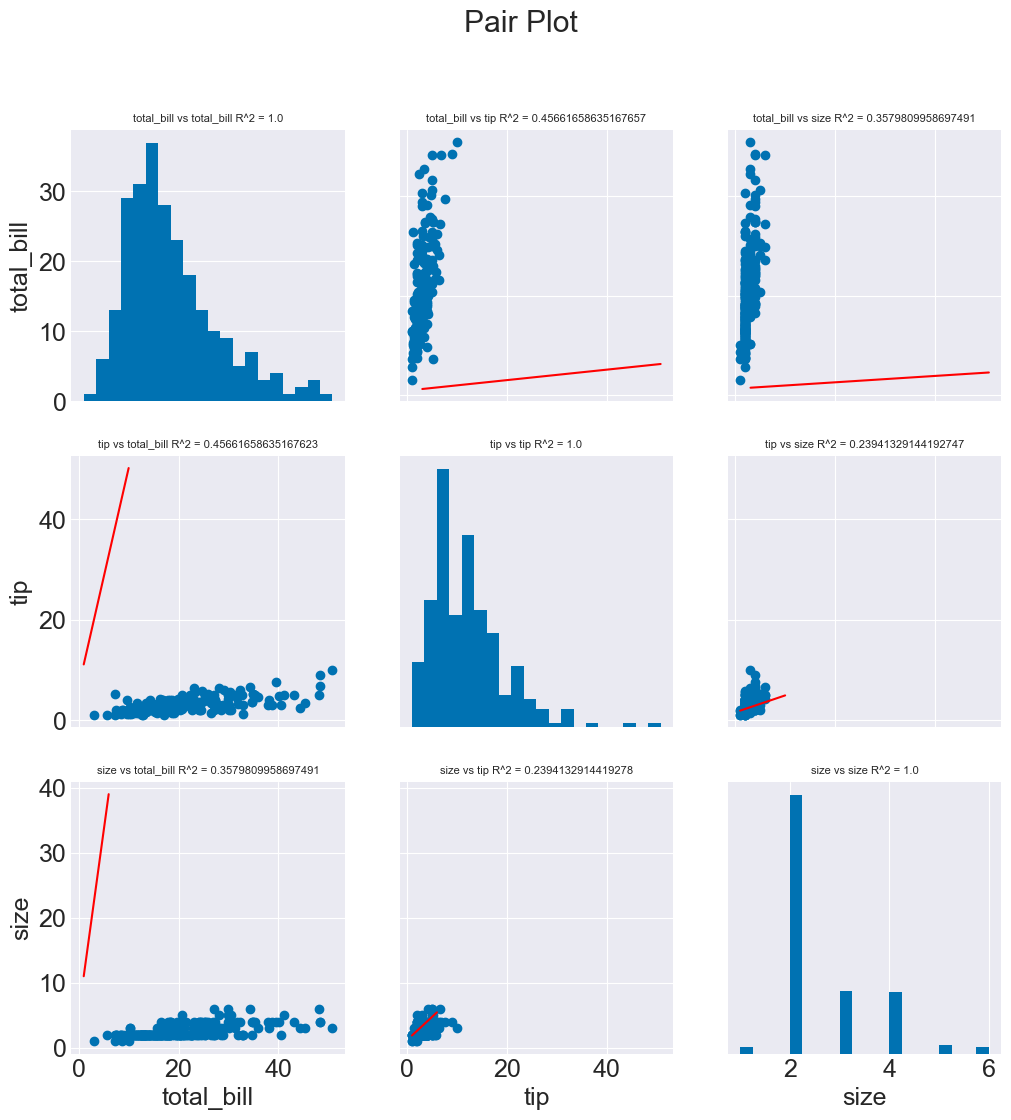

In [66]:
# Plotting pairplot with the histograms on the diagonal
tips_reg.pair_plot(tips_data.get_headers(), hists_on_diag = True)

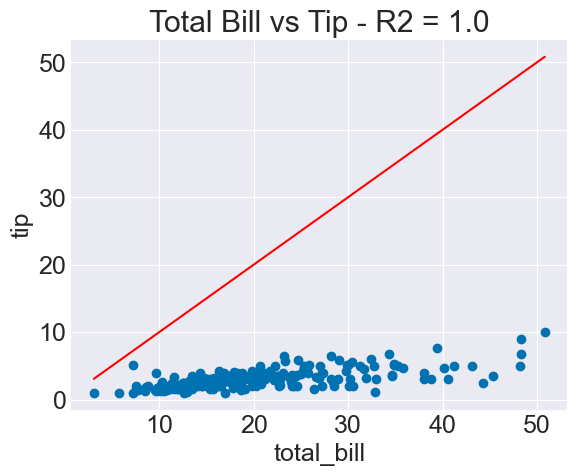

In [67]:
# Plotting a scatter plot of the size vs tip amuount
tips_reg.scatter(ind_var='total_bill', dep_var='tip', title='Total Bill vs Tip')

A possible hypothesis for running linear regression on the given dataset using only the independent variable "total bill"  and the dependent variable "tip" could be:

"There is a linear relationship between the total bill of a dining party and the amount of tip they leave. Specifically, as the total bill of the dining party increase, the tip amount will also increase."

To test this hypothesis, we could run a simple linear regression with tip as the dependent variable and total bill as the independent variable. The regression analysis would provide us with coefficients that represent the strength and direction of the relationships between the independent variable and the dependent variable. We could use the coefficients to make predictions about the tip amount based on the total bill of the dining party.

In [68]:
# Running linear regression on the data with size and total bill as the independent variables and tip as the dependent variable
tips_reg.linear_regression(ind_vars=['total_bill'], dep_var='tip')

In [69]:
# Printing the regression fitted slope coefficients shape
print('Regression fitted slope coefficients shape:', tips_reg.slope.shape)
print()
# Printing the regression fitted slope coefficients
print('Regression fitted slope coefficients: ', tips_reg.slope)
print()
# Printing the regression fitted intercept
print('Regression fitted intercept: ', tips_reg.intercept)
print()

Regression fitted slope coefficients shape: (1, 1)

Regression fitted slope coefficients:  [[0.10502]]

Regression fitted intercept:  0.9202696135546724



In [70]:
# Running predict on the data
tips_predict_data = Data(tips_filename)
tips_predict_data.limit_samples(0, 10)
tips_reg_predict = LinearRegression(tips_predict_data)
tips_reg_predict.linear_regression(ind_vars=['total_bill'], dep_var='tip')
tips_predict_values = tips_reg_predict.predict()

# Printing the shape of the predicted values
print('Predicted values shape:', tips_predict_values.shape)
print()
# Printing the predicted values
print('Predicted values:', tips_predict_values)

Predicted values shape: (10, 1)

Predicted values: [[2.59665]
 [1.78072]
 [3.08989]
 [3.41749]
 [3.52914]
 [3.61503]
 [1.58809]
 [3.81011]
 [2.35739]
 [2.32549]]


In [71]:
# Computing linear regression statistics
tips_reg_predict.linear_regression(ind_vars=['total_bill'], dep_var='tip')
# Shapes of instance variables
print('Shapes of instance variables:')
print('A shape:', tips_reg.A.shape)
print('y shape:', tips_reg.y.shape)
print('slope shape:', tips_reg.slope.shape)
print('intercept shape:', tips_reg.intercept.shape)
print('residuals shape:', tips_reg.residuals.shape)
print('r2 shape:', tips_reg.R2.shape)
print('mse shape:', tips_reg.mse.shape)
print()

# Printing the linear regression statistics
print('Linear regression statistics:')
print('A:', tips_reg.A)
print('y:', tips_reg.y)
print('slope:', tips_reg.slope)
print('intercept:', tips_reg.intercept)
print('residuals:', tips_reg.residuals[:5].T)
print('r2:', tips_reg.R2)
print('mse:', tips_reg.mse)
print()

Shapes of instance variables:
A shape: (244, 1)
y shape: (244, 1)
slope shape: (1, 1)
intercept shape: ()
residuals shape: (244, 1)
r2 shape: ()
mse shape: ()

Linear regression statistics:
A: [[16.99]
 [10.34]
 [21.01]
 [23.68]
 [24.59]
 [25.29]
 [ 8.77]
 [26.88]
 [15.04]
 [14.78]
 [10.27]
 [35.26]
 [15.42]
 [18.43]
 [14.83]
 [21.58]
 [10.33]
 [16.29]
 [16.97]
 [20.65]
 [17.92]
 [20.29]
 [15.77]
 [39.42]
 [19.82]
 [17.81]
 [13.37]
 [12.69]
 [21.7 ]
 [19.65]
 [ 9.55]
 [18.35]
 [15.06]
 [20.69]
 [17.78]
 [24.06]
 [16.31]
 [16.93]
 [18.69]
 [31.27]
 [16.04]
 [17.46]
 [13.94]
 [ 9.68]
 [30.4 ]
 [18.29]
 [22.23]
 [32.4 ]
 [28.55]
 [18.04]
 [12.54]
 [10.29]
 [34.81]
 [ 9.94]
 [25.56]
 [19.49]
 [38.01]
 [26.41]
 [11.24]
 [48.27]
 [20.29]
 [13.81]
 [11.02]
 [18.29]
 [17.59]
 [20.08]
 [16.45]
 [ 3.07]
 [20.23]
 [15.01]
 [12.02]
 [17.07]
 [26.86]
 [25.28]
 [14.73]
 [10.51]
 [17.92]
 [27.2 ]
 [22.76]
 [17.29]
 [19.44]
 [16.66]
 [10.07]
 [32.68]
 [15.98]
 [34.83]
 [13.03]
 [18.28]
 [24.71]
 [21.1

In [72]:
# Create fit and validation sets
tips_data_fit = Data(tips_filename)
tips_data_fit.limit_samples(0, 120)
tips_data_val = Data(tips_filename)
tips_data_val.limit_samples(120, 240)

# Printing the fit and validation sets
print('Fit set:')
print(tips_data_fit)
print()
print('Validation set:')
print(tips_data_val)
print()

Fit set:
data/tips.csv (120x3)
Headers:
  total_bill	  tip	  size	
-----------------------
Showing first 5/120 rows.
16.99	1.01	2.0	
10.34	1.66	3.0	
21.01	3.5	3.0	
23.68	3.31	2.0	
24.59	3.61	4.0	


Validation set:
data/tips.csv (120x3)
Headers:
  total_bill	  tip	  size	
-----------------------
Showing first 5/120 rows.
11.69	2.31	2.0	
13.42	1.68	2.0	
14.26	2.5	2.0	
15.95	2.0	2.0	
12.48	2.52	2.0	




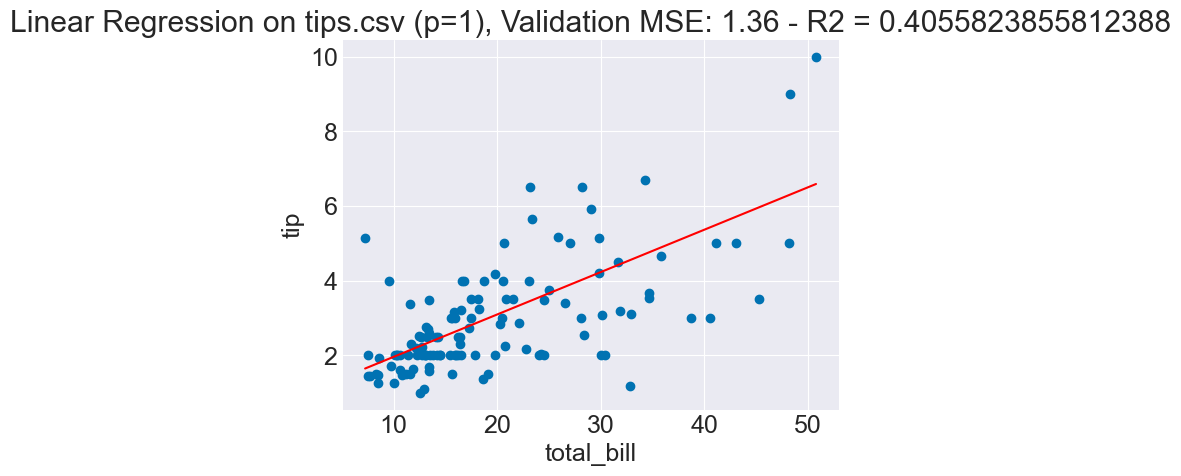

Fit MSE: 0.7134413856905851
Validation MSE: 1.358880011608691


In [73]:
# Check fit generalization on validation set

# Run linear regression on the fit set
tips_reg_fit = LinearRegression(tips_data_fit)
tips_reg_fit.linear_regression(ind_vars=['total_bill'], dep_var='tip')

# Create a new regression model for the validation set
tips_reg_val = LinearRegression(tips_data_val)

# Copy over the fitted slope and intercept from the fit set
tips_reg_val.initialize(['total_bill'], 'tip', tips_reg_fit.get_fitted_slope(), tips_reg_fit.get_fitted_intercept(), p = 1)

# Create a scatter plot of the fit set
tips_reg_val.scatter('total_bill', 'tip', f'Linear Regression on tips.csv (p={1}), Validation MSE: {tips_reg_val.mse:.2f}')

# Compute and print the MSe for both the fit and validation data
print(f'Fit MSE: {tips_reg_fit.mse}')
print(f'Validation MSE: {tips_reg_val.mse}')

## Dicussion

In this extension, I ran a linear regression analysis on the "tips" dataset, focusing on the relationship between the total bill of a dining party and the amount of tip they leave. The hypothesis was that there is a linear relationship between the two variables and that the tip amount increases as the total bill of the dining party increases.

The linear regression analysis yielded a slope coefficient of 0.10502 and an intercept of 0.9202696135546724. These coefficients suggest a positive linear relationship between total bill and tip amount. In other words, as the total bill of the dining party increases, the tip amount also increases.

To validate the model, I split the data into two sets - a fit set (the first 120 rows of the dataset) and a validation set (the remaining 120 rows of the dataset). I then calculated the mean squared error (MSE) for the fit and validation sets. The fit MSE was 0.7134413856905851, while the validation MSE was 1.358880011608691. This suggests that the model performs better on the fit set than on the validation set, indicating some overfitting.

Overall, these results support the hypothesis that there is a linear relationship between total bill and tip amount, with the tip amount increasing as the total bill of the dining party increases. However, the model may need further refinement to improve its performance on new, unseen data.